In [12]:
from statistics import median
from datetime import date
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

from file import load_all


In [34]:
rows = []
all_data = load_all()
for symbol, data in all_data.items():
    rows.append({
        'symbol': symbol,
        'median contracts': median(len(w['options']) for w in data['options_weekly']),
        'median contract transactions':
            median(h.transactions for w in data['options_weekly'] for p in w['options'] for h in p['history']),
        'stock splits': len(data['stock_splits']),
    })
df = pd.DataFrame(rows)
print(df.sort_values('median contract transactions', ascending=False))

   symbol  median contracts  median contract transactions  stock splits
15   AAPL              20.0                          25.0             0
2    TSLA              20.0                          22.0             1
4    AMZN              19.0                          14.0             0
16   TQQQ              12.0                          14.0             0
11  GOOGL              19.5                          10.0             1
14   SOXL              12.0                          10.0             0
8    SHOP              15.0                          10.0             1
6    MSFT              20.0                           9.0             0
7    SNOW              16.0                           9.0             0
17     SQ              15.0                           9.0             0
3     QQQ              28.0                           8.0             0
18    CRM              15.0                           8.0             0
12    SPY              32.0                           8.0       

          USD        SMH       TSLA        QQQ       AMZN       NFLX  \
0    4.521739   1.009709   1.009709   1.000000   1.009709   1.009709   
1    4.727273   1.009709   1.009709   1.000000   1.009709   1.009709   
2    4.521739   1.009709   1.009709   1.000000   1.009709   1.009709   
3    4.521739   1.009709   1.009709   1.000000   1.009709   1.009709   
4    4.333333   1.019608   1.009709   1.000000   1.009709   1.009709   
5    4.521739   1.019608   1.019608   1.000000   1.019608   1.019608   
6    4.333333   1.040000   1.029703   1.040000   1.029703   1.029703   
7    4.333333   1.733333   1.733333   1.762712   1.733333   1.733333   
8    4.333333   4.333333   4.333333   3.586207   4.333333   4.333333   
9    5.777778   4.333333   4.333333   3.466667   4.333333   4.333333   
10  13.000000   4.521739   4.333333   3.466667   4.333333   4.333333   
11  13.000000   4.727273   4.333333   3.354839   4.333333   4.333333   
12  13.000000   4.727273   4.333333   3.466667   4.333333   4.33

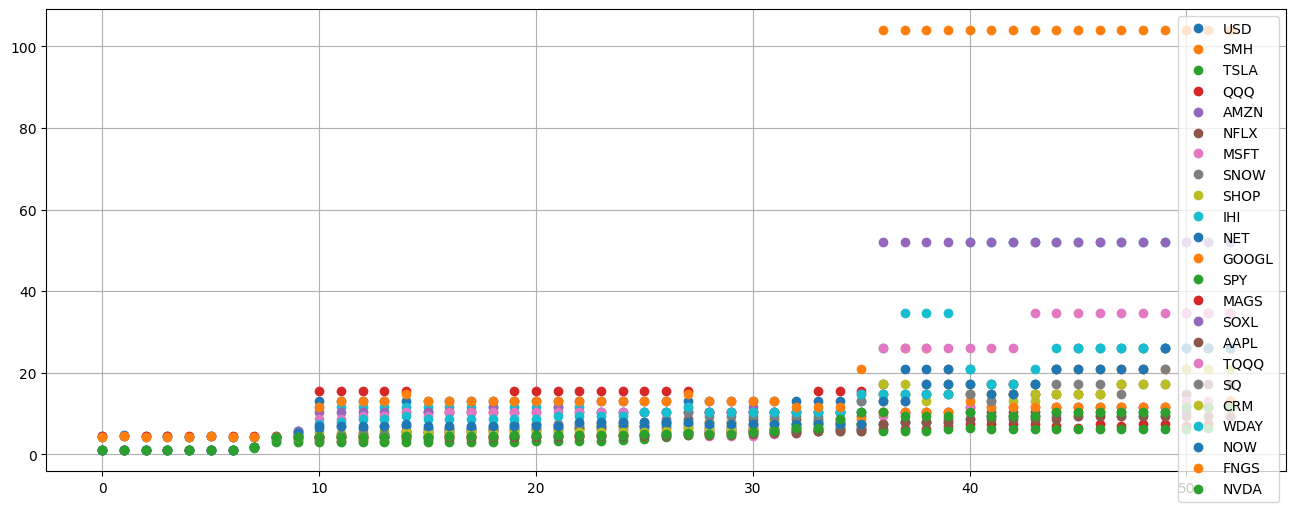

In [36]:

plt.figure(figsize=(16,6))

columns = {}
# for symbol in ['SMH']:
for symbol, data in all_data.items():
  # data = all_data[symbol]
  exp = [round((date.fromisoformat(p['contract'].expiration_date) - w['day'].date).days/7) 
          for w in data['options_weekly'] for p in w['options']]
  exp = [x for x in exp if x <= 52]
  occurrences = Counter(exp)
  all_weeks = len(data['options_weekly'])
  rates = {k: max(1,all_weeks/v) for k, v in occurrences.items()}
  plt.plot(rates.keys(), rates.values(), label=symbol, marker='o', linestyle='None')
  columns[symbol] = pd.Series(rates.values(), index=rates.keys())
    
plt.grid()
plt.legend()
df = pd.DataFrame(columns).sort_index()
print(df)
